In [1]:
import os
from os.path import dirname

root_dir = dirname(os.getcwd())
os.chdir(root_dir)

In [2]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [4]:
from src.nn.models import DengueNN

In [5]:
device = 'cpu'
location = 'sanjuan'

In [6]:
nn = DengueNN(
    device=device,
    location=location,
    data_csv_path=f'data/calibration/{location}/data.csv',
    params_yaml_path=f'data/params/params.yaml',
    lr=1e-2,
    epochs=1000,
    hidden_dim=32,
    hidden_num=3,
)

In [7]:
true_data = nn.cumulative_cases
hist, pred_data = nn.train()

Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Best Loss: 0.0312


In [8]:
true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)
pred_data_tensor_normalized = torch.tensor(pred_data, dtype=torch.float32).unsqueeze(-1)

criterion = torch.nn.MSELoss()
loss_normalized = criterion(pred_data_tensor_normalized, true_data_tensor_normalized)
loss_normalized = float(loss_normalized.detach().cpu().numpy())

/tmp/ipykernel_83956/2463651699.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)


In [9]:
true_data_tensor = true_data_tensor_normalized.expm1()
pred_data_tensor = pred_data_tensor_normalized.expm1()

loss = criterion(pred_data_tensor, true_data_tensor)
loss = float(loss.detach().cpu().numpy())

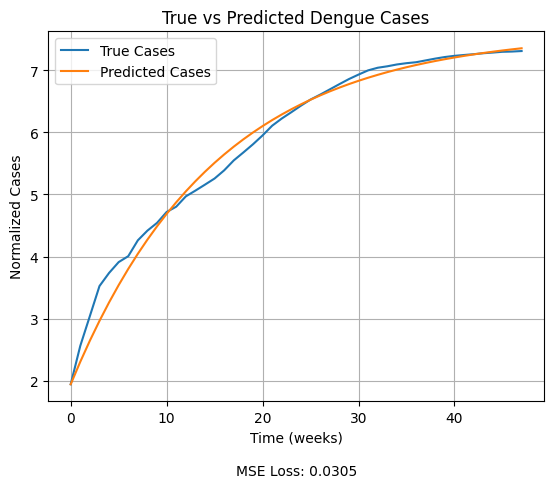

In [10]:
fig1, ax1_fig1 = plt.subplots()
ax1_fig1.plot(true_data_tensor_normalized, label='True Cases')
ax1_fig1.plot(pred_data_tensor_normalized, label='Predicted Cases')
ax1_fig1.set_xlabel('Time (weeks)')
ax1_fig1.set_ylabel('Normalized Cases')
ax1_fig1.set_title('True vs Predicted Dengue Cases')
ax1_fig1.text(0.5, -0.2, f'MSE Loss: {loss_normalized:.4f}', transform=ax1_fig1.transAxes, ha='center')
ax1_fig1.legend()
ax1_fig1.grid(True)
plt.show()

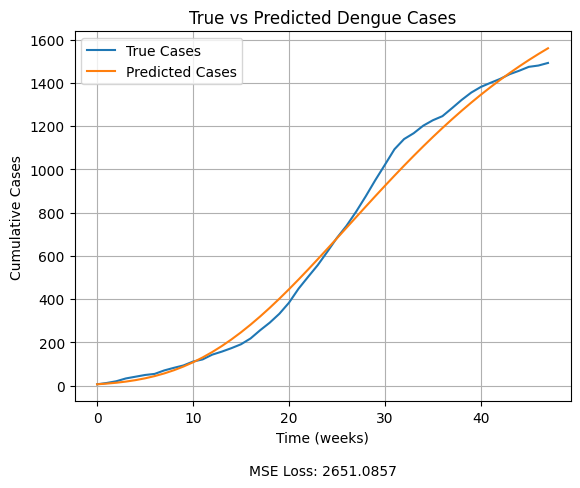

In [11]:
fig2, ax1_fig2 = plt.subplots()
ax1_fig2.plot(true_data_tensor, label='True Cases')
ax1_fig2.plot(pred_data_tensor, label='Predicted Cases')
ax1_fig2.set_xlabel('Time (weeks)')
ax1_fig2.set_ylabel('Cumulative Cases')
ax1_fig2.set_title('True vs Predicted Dengue Cases')
ax1_fig2.text(0.5, -0.2, f'MSE Loss: {loss:.4f}', transform=ax1_fig2.transAxes, ha='center')
ax1_fig2.legend()
ax1_fig2.grid(True)
plt.show()

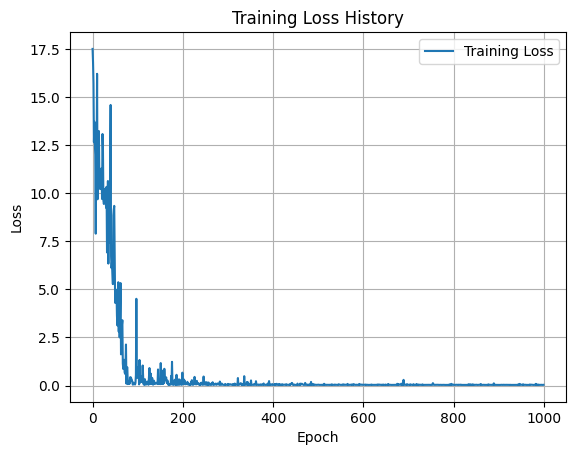

In [12]:
fig3, ax1_fig3 = plt.subplots()
ax1_fig3.plot(hist, label='Training Loss')
ax1_fig3.set_xlabel('Epoch')
ax1_fig3.set_ylabel('Loss')
ax1_fig3.set_title('Training Loss History')
ax1_fig3.legend()
ax1_fig3.grid(True)
plt.show()

In [13]:
fig1.savefig(f'results/{location}/normalized_cases.png', bbox_inches='tight')
fig2.savefig(f'results/{location}/cumulative_cases.png', bbox_inches='tight')
fig3.savefig(f'results/{location}/training_loss.png', bbox_inches='tight')